Завдання 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


bright_nebula_palette = ["#121858", "#7D5FFF", "#B794F6", "#FFFFFF", "#FF3B3B"]

# Використовуємо палітру в Seaborn
sns.set_palette(sns.color_palette(bright_nebula_palette))

In [2]:
main_df = pd.read_csv('ab_test_result - ab_test_result.csv', index_col=0)
print(main_df.head())
print( main_df.info())
print(main_df.describe())

missing_values = main_df.isnull().sum()

test_groups = main_df['test_group'].unique()

unique_countries = main_df['country'].nunique()

missing_values, test_groups, unique_countries

          date test_group  send  open  clicks  purchase country
id                                                             
0   2021-03-12          B    19     4       0         0      UA
1   2021-03-13          B   106    17       3         0      FR
2   2021-03-14          B    47     9       1         0      UA
4   2021-03-18          A   163    32       5         0      NG
5   2021-03-18          B    30     5       0         0      EG
<class 'pandas.core.frame.DataFrame'>
Index: 10219 entries, 0 to 13000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        10219 non-null  object
 1   test_group  10219 non-null  object
 2   send        10219 non-null  int64 
 3   open        10219 non-null  int64 
 4   clicks      10219 non-null  int64 
 5   purchase    10219 non-null  int64 
 6   country     10219 non-null  object
dtypes: int64(4), object(3)
memory usage: 638.7+ KB
None
               send          ope

(date          0
 test_group    0
 send          0
 open          0
 clicks        0
 purchase      0
 country       0
 dtype: int64,
 array(['B', 'A'], dtype=object),
 212)

In [3]:
main_df.drop(main_df.index[main_df['country']=='unknown'], inplace=True)
main_df['country'].value_counts()

country
FR    1392
US     938
UA     598
QA     203
SG     173
      ... 
LI       3
TK       2
SH       2
SM       1
SJ       1
Name: count, Length: 211, dtype: int64

COUNTRY-BASED ANALYSIS

In [4]:
def a_b_rate(series):
    return series.iloc[0]/series.iloc[1]

In [5]:
# Групування за країною та тестовою групою
country_stats = main_df.groupby(["country", "test_group"]).sum()[["send", "open", "clicks", "purchase"]].reset_index()

country_stats["success_rate"] = country_stats["purchase"] / country_stats["open"]

country_stats

,country,test_group,send,open,clicks,purchase,success_rate
0,AD,A,1594,546,66,8,0.014652
1,AD,B,91,23,2,0,0.000000
2,AE,A,4445,1420,175,18,0.012676
3,AE,B,9112,2017,325,35,0.017353
4,AF,A,4887,1553,217,28,0.018030
...,...,...,...,...,...,...,...
409,YT,A,978,351,55,9,0.025641
410,ZM,A,5314,1637,207,28,0.017104
411,ZM,B,3503,771,129,9,0.011673
412,ZW,A,3451,1118,140,17,0.015206


In [26]:
country_g_stats = country_stats.groupby('country').agg({
    'test_group':a_b_rate,'open': 'sum', 'clicks': 'sum', 'purchase': 'sum'}).reset_index()


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [7]:
country_stats_sorted = country_stats.sort_values(by="send", ascending=False)

country_stats_sorted

,country,test_group,send,open,clicks,purchase,success_rate
118,FR,B,109114,24903,3896,399,0.016022
386,US,B,75989,17640,2763,275,0.015590
382,UA,B,46357,10827,1719,168,0.015517
117,FR,A,38618,12513,1651,209,0.016703
385,US,A,25691,7772,1030,119,0.015311
...,...,...,...,...,...,...,...
362,TJ,B,101,33,4,0,0.000000
126,GF,B,98,30,5,0,0.000000
1,AD,B,91,23,2,0,0.000000
367,TM,B,90,29,6,1,0.034483


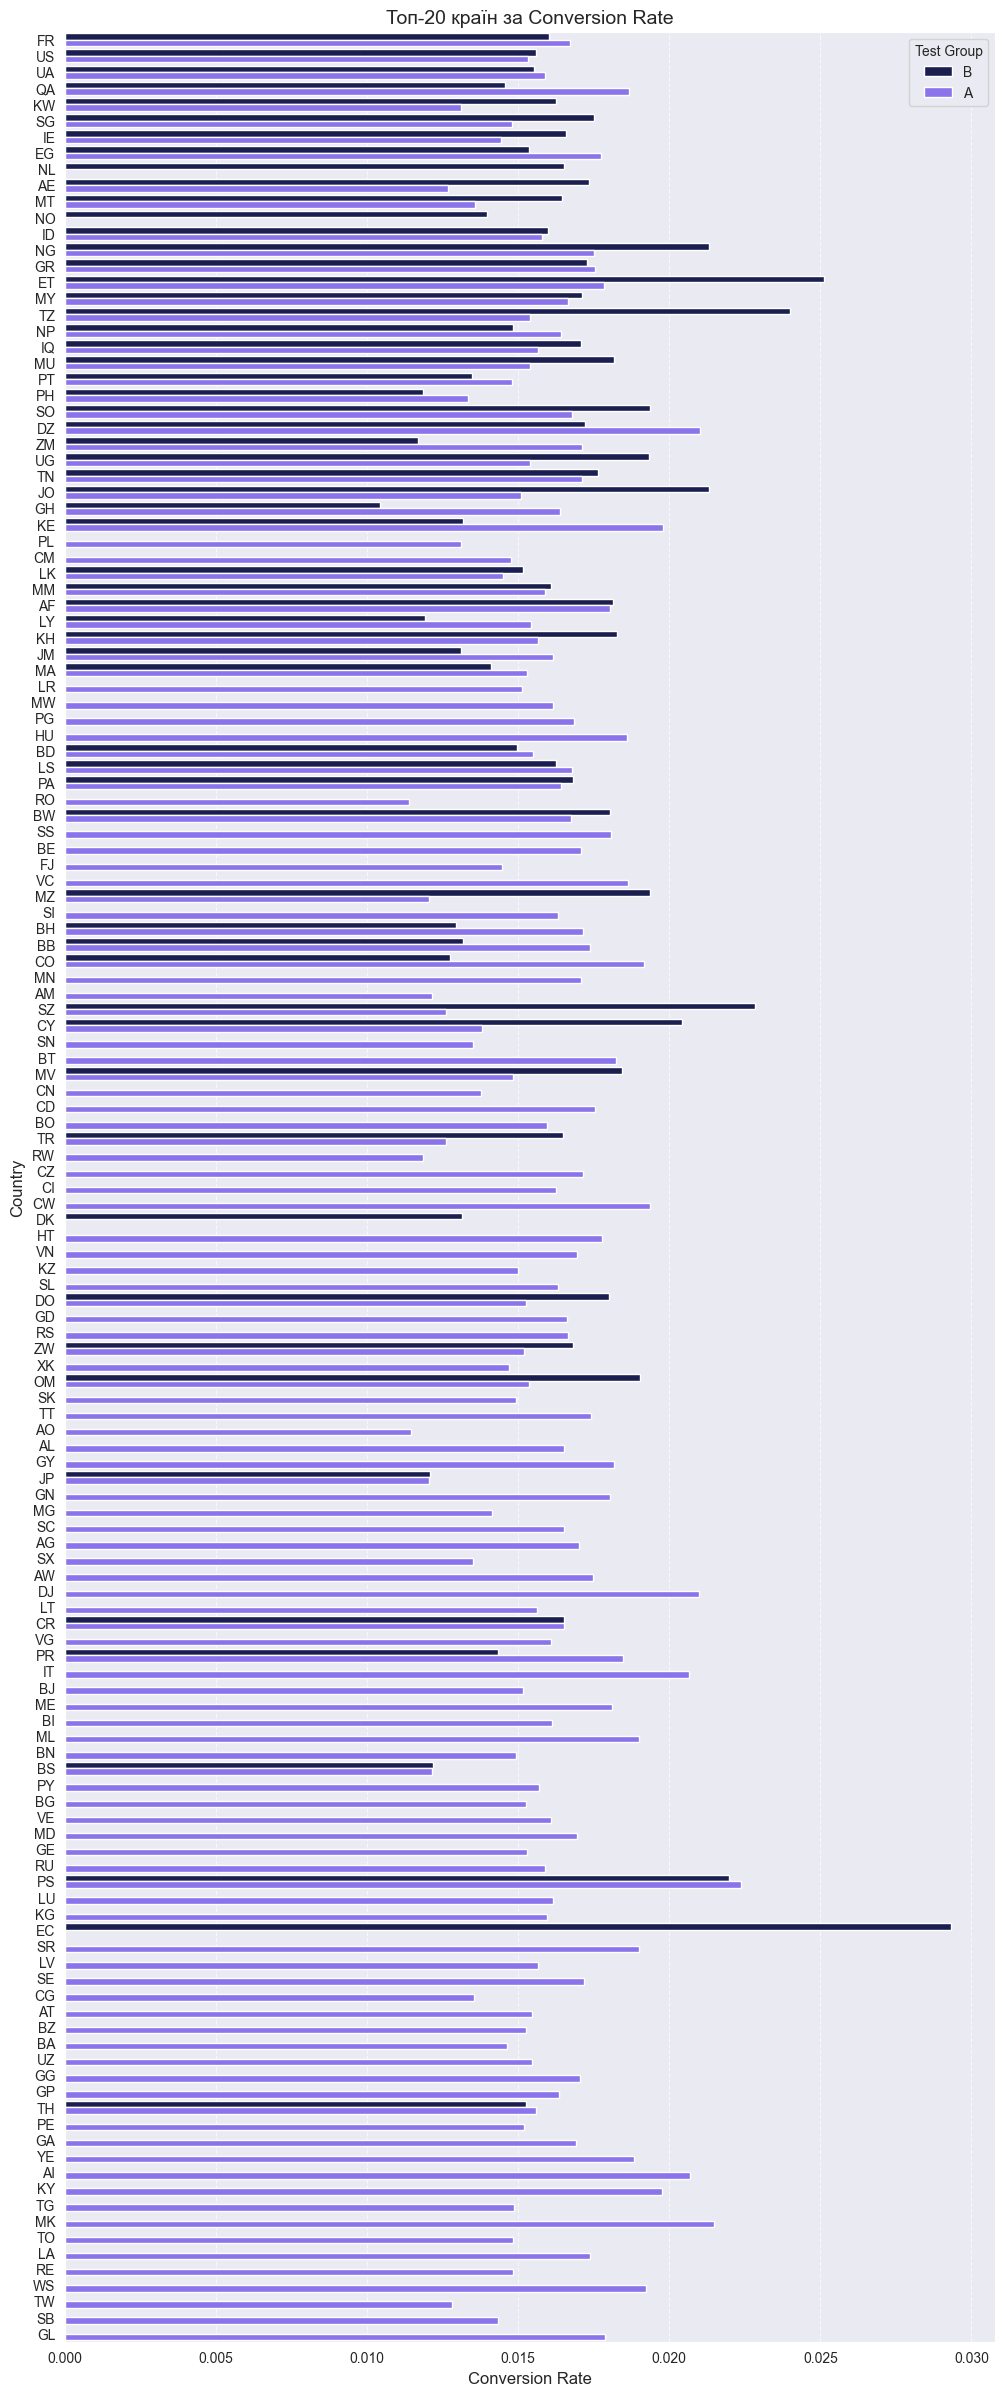

In [8]:
# Візуалізація CR для різних країн
plt.figure(figsize=(12, 30))
sns.barplot(data=country_stats_sorted[:200], x="success_rate", y="country", hue="test_group")

plt.title("Топ-20 країн за Conversion Rate", fontsize=14)
plt.xlabel("Conversion Rate", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.legend(title="Test Group")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


GROUP-BASED ANALYSIS

In [20]:
grouped_df = main_df.groupby("test_group").sum()

grouped_df["open_rate"] = grouped_df["open"] / grouped_df["send"]
grouped_df["ctr"] = grouped_df["clicks"] / grouped_df["open"] # licked through
grouped_df["conversion_rate"] = grouped_df["purchase"] / grouped_df["clicks"]

grouped_df[["send", "open", "clicks", "purchase", "open_rate", "ctr", "conversion_rate"]].head()


,send,open,clicks,purchase,open_rate,ctr,conversion_rate
test_group,,,,,,,
A,681372,214953,28177,3454,0.315471,0.131084,0.122582
B,679919,157319,24794,2538,0.231379,0.157603,0.102363


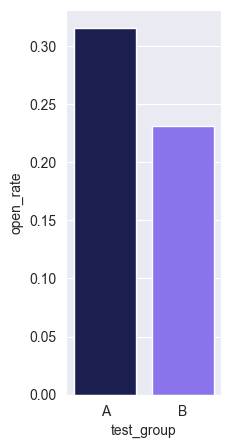

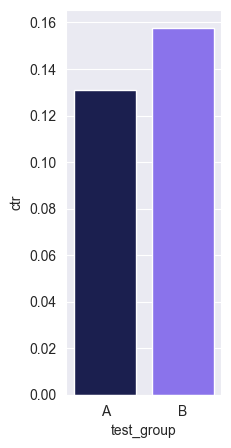

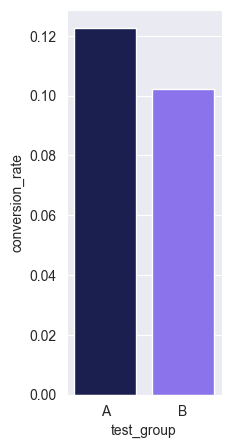

In [25]:

plt.figure(figsize=(2, 5))
sns.barplot(data=grouped_df,x="test_group", y="open_rate"
, hue="test_group")
plt.show()

plt.figure(figsize=(2, 5))
sns.barplot(data=grouped_df,x="test_group", y="ctr", hue="test_group")
plt.show()

plt.figure(figsize=(2, 5))
sns.barplot(data=grouped_df,x="test_group", y="conversion_rate", hue="test_group")
plt.show()

In [10]:
sns.histplot(main_df, x="country", y="open_rate", hue="test_group")

ValueError: Could not interpret value `open_rate` for `y`. An entry with this name does not appear in `data`.

Посилання: https://www.canva.com/design/DAGgBxZLza8/Cl5UxHsWXS8tlMXjEQW6Rg/edit?utm_content=DAGgBxZLza8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton 